# SMA Assignment 1

### Group Members: Abhinav Singh, Catherine Miao, Eddie Eustachon, Elaine Wang, Thomas Bruce, Qinpei Zou

### Part I: Find predictors of influence

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

### 1. Read Data

In [46]:
df=pd.read_csv("train.csv",sep=',')

In [47]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### 2. use correlation matrix to check feature correlations

### 2.1 Subset features with individual A 

In [48]:
df2=df[df.columns[1:12]] 

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
A_follower_count,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082
A_following_count,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762
A_listed_count,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574
A_mentions_received,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079
A_retweets_received,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301
A_mentions_sent,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437
A_retweets_sent,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127
A_posts,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347
A_network_feature_1,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711
A_network_feature_2,-0.153272,0.043642,-0.080056,-0.062407,-0.065266,0.064242,-0.048761,-0.066125,-0.118138,1.000000,0.520617


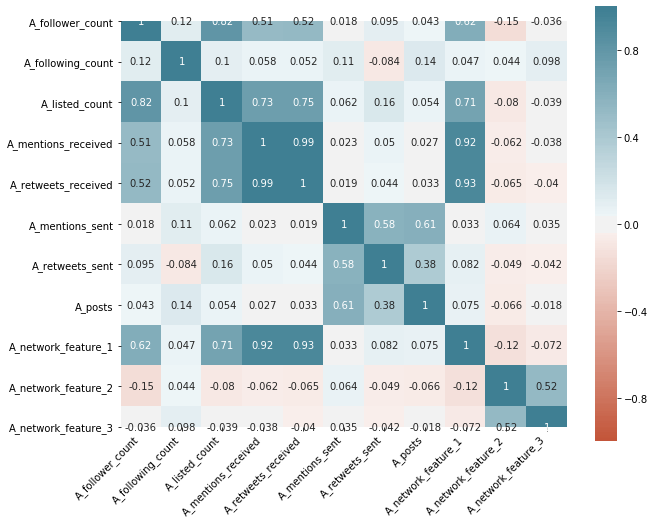

In [49]:
import seaborn as sns #from pandas.plotting import scatter_matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr

### Correlation matrix indicates: 
**we should drop network_feature_1, mentions_received since these two features are both highly correlated with retweets_received, i.e. cor(network_feature_1,retweets_received)=0.928, cor(mentions_received, retweets_received)=0.99.**

### 3. Feature Reduction & Transformation

In [50]:
df4=df[df.columns[1:23]]
df4.replace(0,0.00001,inplace=True)
df4.drop(['A_mentions_received', 'B_mentions_received','A_network_feature_1','B_network_feature_1'],\
axis=1, inplace=True)

In [51]:
df4['diff_follower_count']=df4['A_follower_count'] - df4['B_follower_count']
df4['diff_posts'] = df4['A_posts'] - df4['B_posts']
df4['diff_following_count']=df4['A_following_count'] - df4['B_following_count']
df4['diff_listed_count']=df4['A_listed_count'] - df4['B_listed_count']
df4['diff_retweets_received']=df4['A_retweets_received'] - df4['B_retweets_received']
df4['diff_mentions_sent']=df4['A_mentions_sent'] - df4['B_mentions_sent']
df4['diff_retweets_sent']=df4['A_retweets_sent'] - df4['B_retweets_sent']
df4['diff_posts']=df4['A_posts'] - df4['B_posts']
df4['diff_network_feature_3'] = df4['A_network_feature_3'] - df4['B_network_feature_3']
df4['diff_network_feature_2'] = df4['A_network_feature_2'] - df4['B_network_feature_2']
df4.head()

,A_follower_count,A_following_count,A_listed_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,...,B_network_feature_3,diff_follower_count,diff_posts,diff_following_count,diff_listed_count,diff_retweets_received,diff_mentions_sent,diff_retweets_sent,diff_network_feature_3,diff_network_feature_2
0,228,302.0,3.0,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000,34463,...,1916.893939,-34235,-6.626665,-29506.0,-1686.0,-3.883525,-8.103828,-0.231920,9438.106061,90.969697
1,21591,1179.0,228.0,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048,39262,...,2931.515337,-17671,4.106299,331.0,-1382.0,16.854685,2.481652,0.546816,-1601.149290,-113.587704
2,7310,1215.0,101.0,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907,3622,...,277.333333,3688,2.986516,733.0,-105.0,9.201969,4.758317,0.490702,5722.563574,58.594502
3,20,7.0,2.0,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667,19562,...,1395.845634,-19542,-29.271279,-17630.0,-276.0,-390.016375,-26.220532,-7.067053,-1299.678967,-21.469296
4,45589,862.0,2641.0,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943,7554,...,1993.627907,38035,19.298035,-849.0,2460.0,33.417223,21.117111,2.213765,840.220036,78.904293


### 4. Model Predictions 

#### Baseline Accuracy

In [52]:
len(df[df['Choice']==1])/len(df)

0.5094545454545455

##### (1) Logistic Regression

In [53]:
X=df4.iloc[:,-9:]
Y=df['Choice'].values
scaler = StandardScaler()
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X),columns = X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=18)

Predict accuracy of Logistic Regression is  0.7454545454545455


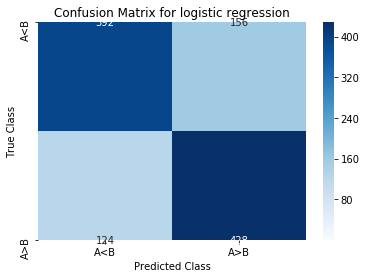

array([[392, 156],
       [124, 428]], dtype=int64)

In [54]:
LR = LogisticRegression().fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
c_lr=confusion_matrix(y_test, y_pred_lr)
print('Predict accuracy of Logistic Regression is ', acc_lr)
labels = ['A<B', 'A>B']
sns.heatmap(c_lr,annot = True, xticklabels=labels, yticklabels=labels, fmt='d', cmap="Blues", vmin = 0.1);
plt.title('Confusion Matrix for logistic regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
c_lr

##### (2) Random Forest

Predict accuracy of Random Forest is  0.7763636363636364


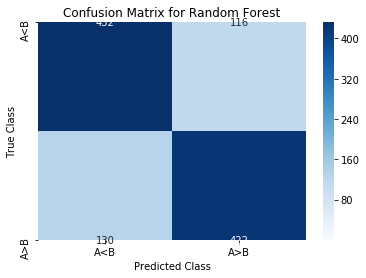

array([[432, 116],
       [130, 422]], dtype=int64)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
c_rf=confusion_matrix(y_test, y_pred_rf)
print('Predict accuracy of Random Forest is ', acc_rf)
labels = ['A<B', 'A>B']
sns.heatmap(c_rf,annot = True, xticklabels=labels, yticklabels=labels, fmt='d', cmap="Blues", vmin = 0.1);
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
c_rf

### Obtain Feature Importance with Random Forest 

In [56]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
diff_listed_count,0.197265
diff_follower_count,0.169970
diff_retweets_received,0.160919
diff_posts,0.088403
diff_mentions_sent,0.084912
diff_network_feature_2,0.080603
diff_network_feature_3,0.077835
diff_following_count,0.075961
diff_retweets_sent,0.064133


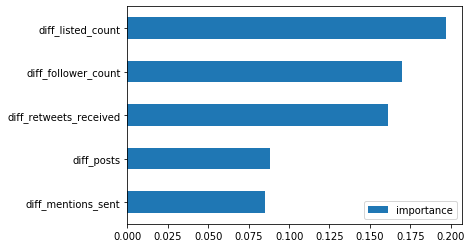

In [57]:
feature_importances[:5].sort_values('importance').plot.barh()

**From the random forest model, we got 79.64% predict accuracy in out-of sample data. Also, from the feature importance above, the top three most important features are:**

#### 1. diff_listed_count 
#### 2. diff_follower_count
#### 3. diff_retweets_received

##### (3) XGboost

In [58]:
!pip install xgboost

Predict accuracy of Random Forest is  0.78


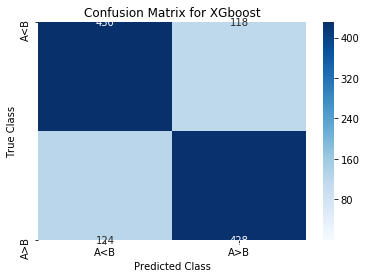

array([[430, 118],
       [124, 428]], dtype=int64)

In [59]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
c_xgb=confusion_matrix(y_test, y_pred_xgb)
print('Predict accuracy of Random Forest is ', acc_xgb)
labels = ['A<B', 'A>B']
sns.heatmap(c_xgb, annot = True, xticklabels=labels, yticklabels=labels, fmt='d', cmap="Blues", vmin = 0.1);
plt.title('Confusion Matrix for XGboost')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
c_xgb

#### Therefore, both the Random Forest and the XGboost model achieve an accuracy ~ 79%. 

**From the random forest model, we determine that diff_listed_count, diff_follower_count, diff_retweets_received are three important predictors of influencers.**

**Diff_listed_count** is the most important variable which accounts for about 21%. Listed_count measures that the number of people that are in this users' list. A List is a curated group of Twitter accounts. The higher listed_count, the more people follow with interest.

**Diff_follower_count** is the second important variable which accounts for 16.6%. Follow_count is the number of followers this account currently has. So diff_follower_count shows how many more followers  A have than B. The more diff_follower_count, the more likely that A's influence power is higher than B's.

**Diff_retweets_received** is the third important variable which accouts for 15.1%. Retweets_received is the number of retweets this user received. The more retweets he/she received, the more people pay attention to the tweets he/she sent. So diff_retweets_received is another good predictor to measure the influencial difference between A and B.


### Business Implication of our model: 

If a business is having a marketing promotion and in need of allocating limited funding to pay selected media influencers, then this model would help their decision making on who is the better influencer i.e. which media influencer will bring higher profit for the business, and thus the individual to pay. 

In addition, it is a great model for businesses to strategize their advertsing campaign. For example, when new product is launched, the busienss needs to advertise the new products on social media platform. It would be an excellent way to employ this predictive model so as to target right influencers, and in turn, make the advertising campaign more effective.

### Calculate the financial value of our model

**Without analytics:**

Profit_1 = 10 ✖ 0.01% ✖ (A_followers_count + B_followers_count) - 5 ✖ (# of A + # of B)

**With analytics:**

Profit_2 = 10 ✖ 0.015% ✖ prediction accuracy ✖  Influencers_followers_count - 10 ✖  # of Influencer

**Lift in net profit:**
Profit_2 - Profit_1

**Percentage lift in net profit:** 

(Profit_2 - Profit_1)/Profit_1x100%

**Since without analytics, the retailer will let everyone (A+B) tweet once. so the profit_1 will be: (under assumption: Each user appears only once in the data)**

In [60]:
# When A is influencer, the choice is 1.
# A_influencer_follower calculates the followers of A if A is an influencer
A_influencer_follower = sum(df['A_follower_count'][df['Choice']==1])

# the same for B
B_influencer_follower = sum(df['B_follower_count'][df['Choice']==0])


In [61]:
profit_1 = 10*0.0001*(A_influencer_follower+B_influencer_follower) - 5*(len(df)+len(df))
print('Profit without analytics : ', round(profit_1,2) )

Profit without analytics :  5321568.59


**With analytics, the retailer will only target influencer and our model accuracy is 79.45%. Also, the retailer only target at A or B. The profit_2 will be:** 

In [62]:
profit_2 = 10*0.00015*0.7945*(A_influencer_follower+B_influencer_follower) - 10*(len(df))
print('Profit with analytics : ', round(profit_2,2) )

Profit with analytics :  6352525.62


In [63]:
lift_profit = profit_2 - profit_1
print('Lift in profit : ', round(lift_profit,2))

lift_profit = (profit_2 - profit_1)/profit_1
print('%Lift in profit : ', round(100*lift_profit,1),"%")

Lift in profit :  1030957.03
%Lift in profit :  19.4 %


**If using a perfect analytic model which is the predict accuracy is 100%, the lift in net profit will be**

In [64]:
profit_perfect = 10*0.00015*(A_influencer_follower+B_influencer_follower) - 10*(len(df))
lift_profit_perfect = profit_perfect - profit_1
print('Lift in net profit from the perfect analytic model : ', round(lift_profit_perfect,2))
print('%Lift in net profit from the perfect analytic model : ', round(100*lift_profit_perfect/profit_1,1),"%")

Lift in net profit from the perfect analytic model :  2688284.3
%Lift in net profit from the perfect analytic model :  50.5 %


### In conclusion, using our analytic model above would increase profit for the retailer by around 20% compared to not using analytics, while using a perfect model would increase profit by around 50%. Therefore, we determine that the financial value of analytics is substantial 

# Part 2: Finding the top 50 Influencers

#### 1. read the data that we scraped using twitter API

In [65]:
df_2 = pd.read_csv('coronavirus_tweets.csv')

In [66]:
df_2.head()

,Unnamed: 0,id,created_at,verified,username,text,location,listed_count,follower_count,retweet_count
0,0,1226604413164408832,2020-02-09 20:30:55,False,mochihitsugi,b'RT @IGN: The Animal Crossing-themed Nintendo...,hell,0,68,150
1,1,1226604412426166272,2020-02-09 20:30:55,False,RocktagonBoss,b'RT @EM_KA_17: \xf0\x9f\x92\xa5 SUCCESS again...,"Las Vegas, NV",217,2813,141
2,2,1226604410786193420,2020-02-09 20:30:55,False,DavidLenlag,b'RT @jenniferatntd: Called a friend in #China...,NaN,0,81,728
3,3,1226604410765271041,2020-02-09 20:30:55,False,ericammbenitez,b'RT @hanalfabeto: Jimena Bar\xc3\xb3n ya est\...,NaN,6,2145,317
4,4,1226604410589020161,2020-02-09 20:30:55,False,GailWil87987475,b'RT @marklevinshow: Our new Middle East frien...,NaN,0,218,440


#### 2. Data Preprocessing:

In [67]:
def decode_string(s):
    return s.lstrip('b"').lstrip("b'")

df_2['text'] = df_2['text'].map(decode_string)

def is_retweet(s):
    if s.startswith('RT '):
        return True
    else:
        return False
    

df_2['retweet'] = df_2['text'].map(is_retweet)

def is_mention(s):
    if '@' in s.lstrip('RT @'):
        return True
    else:
        return False
    
df_2['mention'] = df_2['text'].map(is_mention)

def is_reply(s):
    if s.startswith('@'):
        return True
    else:
        return False
    
df_2['reply'] = df_2['text'].map(is_reply)

In [68]:
df_2.head()

,Unnamed: 0,id,created_at,verified,username,text,location,listed_count,follower_count,retweet_count,retweet,mention,reply
0,0,1226604413164408832,2020-02-09 20:30:55,False,mochihitsugi,RT @IGN: The Animal Crossing-themed Nintendo S...,hell,0,68,150,True,False,False
1,1,1226604412426166272,2020-02-09 20:30:55,False,RocktagonBoss,RT @EM_KA_17: \xf0\x9f\x92\xa5 SUCCESS against...,"Las Vegas, NV",217,2813,141,True,False,False
2,2,1226604410786193420,2020-02-09 20:30:55,False,DavidLenlag,RT @jenniferatntd: Called a friend in #China C...,NaN,0,81,728,True,False,False
3,3,1226604410765271041,2020-02-09 20:30:55,False,ericammbenitez,RT @hanalfabeto: Jimena Bar\xc3\xb3n ya est\xc...,NaN,6,2145,317,True,False,False
4,4,1226604410589020161,2020-02-09 20:30:55,False,GailWil87987475,RT @marklevinshow: Our new Middle East friends...,NaN,0,218,440,True,False,False


In [69]:
import re
mentioners = []
mentionees = []
repliers = []
replied_to = []
retweeters = []
retweetees = []

def get_ats(s):
    s = s.lstrip('RT @').lstrip('@')
    for user in re.findall('@[A-Za-z]+', s):
        mentionees.append(user.lstrip('@'))
        mentioners.append(df_2['username'][i])
        
def get_replied(s):
    s = s.lstrip('@')
    return re.split(' ',s)[0]

def get_retweetee(s):
    return re.split(':',s)[0]

for i in df_2.index.values:
    if df_2['retweet'][i]:
        retweeters.append(df_2['username'][i])
        retweetees.append(get_retweetee(df_2['text'][i]).lstrip('RT @'))
    if df_2['mention'][i]:
        get_ats(df_2['text'][i])
    if df_2['reply'][i]:
        replied_to.append(get_replied(df_2['text'][i]))
        repliers.append(df_2['username'][i])

In [70]:
df_network = pd.DataFrame()
df_network = pd.DataFrame()
mentioners = pd.Series(mentioners)
mentionees = pd.Series(mentionees)
df_network = pd.DataFrame([mentioners, mentionees])
df_network = df_network.T
df_network['Type'] = pd.Series(['Mention']*len(mentioners))
df_network.head()

,0,1,Type
0,LazyOaf_RS,Skiddler,Mention
1,dangersam4,XuZeyu,Mention
2,Cc12349565153,DarrenPlymouth,Mention
3,CarcosaV,realDonaldTrump,Mention
4,CarcosaV,SenSanders,Mention


#### 3. Calculate Degree, Betweenness, Closeness

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [72]:
G_symmetric = nx.Graph()

In [73]:
df_network.iloc[1][0]

'dangersam4'

In [74]:
for i in range(len(df_network)):
    G_symmetric.add_edge(df_network.iloc[i][0],  df_network.iloc[i][1])

In [75]:
degree = nx.degree_centrality(G_symmetric)

In [76]:
closeness = nx.closeness_centrality(G_symmetric)

In [77]:
betweeness = nx.betweenness_centrality(G_symmetric)

In [78]:
df_degree = pd.DataFrame(degree.items())
df_betweeness = pd.DataFrame(betweeness.items())
df_closeness = pd.DataFrame(closeness.items())

In [79]:
df_new = df_degree.merge(df_betweeness, left_on=0, right_on=0)
df_result = df_new.merge(df_closeness, left_on = 0, right_on = 0)

In [80]:
df_result = df_result.rename(columns={0:'Account_name','1_x': 'Degree','1_y': 'betweenness',1: 'closeness'})

In [84]:
df_result = df_result.merge(df_2, left_on = 'Account_name', right_on = 'username')
df_result['Degree_betweenness_closeness'] = df_result['Degree']+df_result['betweenness']+df_result['closeness']

In [85]:
df_result

,Account_name,Degree,betweenness,closeness,Degree_betweenness_closeness,Unnamed: 0,id,created_at,verified,username,text,location,listed_count,follower_count,retweet_count,retweet,mention,reply
0,LazyOaf_RS,0.001319,0.000000,0.001319,0.002639,46,1226604390649417728,2020-02-09 20:30:50,False,LazyOaf_RS,Nice knowing u xoxox @Skiddler \n\nhttps://t.c...,"Bristol, England",5,187,0,False,True,False
1,dangersam4,0.001319,0.000000,0.001759,0.003078,73,1226604378372657153,2020-02-09 20:30:47,False,dangersam4,RT @XHNews: What's it like inside a #coronavir...,NaN,0,47,101,True,True,False
2,Cc12349565153,0.001319,0.000000,0.001319,0.002639,78,1226604376015462401,2020-02-09 20:30:47,False,Cc12349565153,RT @QuantyT: @DarrenPlymouth #WHO had not done...,NaN,0,279,2,True,True,False
3,Cc12349565153,0.001319,0.000000,0.001319,0.002639,1190,1226603899349585925,2020-02-09 20:28:53,False,Cc12349565153,RT @jenniferatntd: Probably somewhere in #Guan...,NaN,0,279,218,True,False,False
4,Cc12349565153,0.001319,0.000000,0.001319,0.002639,1707,1226603656360927236,2020-02-09 20:27:55,False,Cc12349565153,RT @HawleyMO: #china communist party tries dis...,NaN,0,279,2064,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,mariadmarzano,0.001319,0.000000,0.001319,0.002639,4924,1226602201713463303,2020-02-09 20:22:08,False,mariadmarzano,RT @ange_cor: @VNotKind La notizia pu\xc3\xb2 ...,NaN,3,496,4,True,True,False
516,antonellatan,0.001319,0.000000,0.009452,0.010771,4929,1226602199356248069,2020-02-09 20:22:08,False,antonellatan,"RT @istsupsan: Rientro italiani dalla Cina, @s...",NaN,0,94,11,True,True,False
517,peppo400,0.001319,0.000000,0.001319,0.002639,4940,1226602194121744384,2020-02-09 20:22:06,False,peppo400,RT @NetworksManager: Someone just dropped bunc...,NaN,0,80,408,True,True,False
518,helenrogers19c,0.002639,0.000084,0.011779,0.014501,4975,1226602182193053696,2020-02-09 20:22:04,False,helenrogers19c,RT @GustavoCMatta: Very clear and honest inter...,NaN,306,8887,4,True,True,False


In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_result['scale_degree'] = scaler.fit_transform(df_result['Degree'].values.reshape(-1,1))
df_result['scale_closeness'] = scaler.fit_transform(df_result['closeness'].values.reshape(-1,1))
df_result['scale_betweenness'] = scaler.fit_transform(df_result['betweenness'].values.reshape(-1,1))
df_result['scale_Degree_betweenness_closeness'] = df_result['scale_degree']+df_result['scale_betweenness']+df_result['scale_closeness']

In [99]:
total_importance = feature_importances['importance']['diff_follower_count'] + feature_importances['importance']['diff_listed_count'] + feature_importances['importance']['diff_retweets_received']
listed_importance = feature_importances['importance']['diff_listed_count'] / total_importance
follower_importance = feature_importances['importance']['diff_follower_count'] / total_importance
retweets_importance = feature_importances['importance']['diff_retweets_received'] / total_importance
print(listed_importance, follower_importance, retweets_importance, (1-total_importance))
df_result['score'] = listed_importance * df_result['listed_count'] + follower_importance * df_result['follower_count'] + retweets_importance * df_result['retweet_count'] + (1-total_importance) * df_result['scale_Degree_betweenness_closeness']

df_result

0.3734984393223049 0.3218194466147219 0.30468211406297313 0.47184578000331645


,Account_name,Degree,betweenness,closeness,Degree_betweenness_closeness,Unnamed: 0,id,created_at,verified,username,...,follower_count,retweet_count,retweet,mention,reply,scale_degree,scale_closeness,scale_betweenness,scale_Degree_betweenness_closeness,score
0,LazyOaf_RS,0.001319,0.000000,0.001319,0.002639,46,1226604390649417728,2020-02-09 20:30:50,False,LazyOaf_RS,...,187,0,False,True,False,0.000000,0.051200,0.000000,0.051200,62.071887
1,dangersam4,0.001319,0.000000,0.001759,0.003078,73,1226604378372657153,2020-02-09 20:30:47,False,dangersam4,...,47,101,True,True,False,0.000000,0.068267,0.000000,0.068267,45.930619
2,Cc12349565153,0.001319,0.000000,0.001319,0.002639,78,1226604376015462401,2020-02-09 20:30:47,False,Cc12349565153,...,279,2,True,True,False,0.000000,0.051200,0.000000,0.051200,90.421148
3,Cc12349565153,0.001319,0.000000,0.001319,0.002639,1190,1226603899349585925,2020-02-09 20:28:53,False,Cc12349565153,...,279,218,True,False,False,0.000000,0.051200,0.000000,0.051200,156.232485
4,Cc12349565153,0.001319,0.000000,0.001319,0.002639,1707,1226603656360927236,2020-02-09 20:27:55,False,Cc12349565153,...,279,2064,True,False,False,0.000000,0.051200,0.000000,0.051200,718.675668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,mariadmarzano,0.001319,0.000000,0.001319,0.002639,4924,1226602201713463303,2020-02-09 20:22:08,False,mariadmarzano,...,496,4,True,True,False,0.000000,0.051200,0.000000,0.051200,161.985828
516,antonellatan,0.001319,0.000000,0.009452,0.010771,4929,1226602199356248069,2020-02-09 20:22:08,False,antonellatan,...,94,11,True,True,False,0.000000,0.366821,0.000000,0.366821,33.775614
517,peppo400,0.001319,0.000000,0.001319,0.002639,4940,1226602194121744384,2020-02-09 20:22:06,False,peppo400,...,80,408,True,True,False,0.000000,0.051200,0.000000,0.051200,150.080017
518,helenrogers19c,0.002639,0.000084,0.011779,0.014501,4975,1226602182193053696,2020-02-09 20:22:04,False,helenrogers19c,...,8887,4,True,True,False,0.052632,0.457143,0.083045,0.592819,2975.798392


## Top 50 influencers, sorted by influence score:

In [100]:
df_result.sort_values(by='score', ascending = False)['Account_name'].drop_duplicates()[:50]

359         MailOnline
53           latercera
44              nypost
24       DiarioTalCual
255     informativost5
34        brianstelter
209        lasillarota
384            News4SA
417       MinSoliSante
482      elnacionalcat
139     SpirosMargaris
469              W7VOA
396     AMarieDussault
166          IntelCrab
478       Eliyahuthorn
380          KABBFOX29
21             Noterad
332      SassySculptor
333        cmgorriaran
374            hanayuu
461              LgSOS
88          KaraMar111
232         Aramaithea
385      Kimmerztweets
502         rnlynn1958
52      FutureTenseNow
55         twittopolis
207          MTBracken
151           MsMoon53
519          AnnaMaga7
322      smartertrader
147       DanielRemedi
457        AkireLincho
161    ZenfinityDesign
145          DailyDOOH
256      JustOneVoice4
215         lola_patty
353    MILTONESPINOZAF
510       salvadorilla
257          marionste
117         ll_ribelle
485       Ronald1969HT
518     helenrogers19c
415    alll